In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
df=pd.read_csv('Wholesale customers data.csv.txt')
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [3]:
df.shape

(440, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [5]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [6]:
df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [7]:
y=df[['Channel']]

In [8]:
df.drop(['Region','Channel'],axis=1,inplace=True)

In [9]:
df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [10]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(df)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [11]:
Scaled_X=sc.transform(df)
Scaled_X

array([[ 0.05293319,  0.52356777, -0.04111489, -0.58936716, -0.04356873,
        -0.06633906],
       [-0.39130197,  0.54445767,  0.17031835, -0.27013618,  0.08640684,
         0.08915105],
       [-0.44702926,  0.40853771, -0.0281571 , -0.13753572,  0.13323164,
         2.24329255],
       ...,
       [ 0.20032554,  1.31467078,  2.34838631, -0.54337975,  2.51121768,
         0.12145607],
       [-0.13538389, -0.51753572, -0.60251388, -0.41944059, -0.56977032,
         0.21304614],
       [-0.72930698, -0.5559243 , -0.57322717, -0.62009417, -0.50488752,
        -0.52286938]])

In [12]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit(Scaled_X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [13]:
df_New=pca.transform(Scaled_X)
df_New.shape

(440, 2)

Text(0, 0.5, 'Second Principal Component')

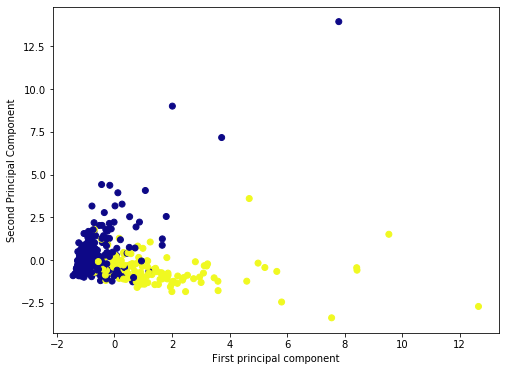

In [15]:
plt.figure(figsize=(8,6))
plt.scatter(df_New[:,0],df_New[:,1],c=y['Channel'],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

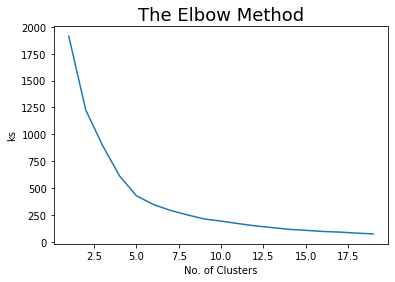

<Figure size 720x360 with 0 Axes>

In [16]:
from sklearn.cluster import KMeans
ks = []
for i in range(1, 20):
    km = KMeans(n_clusters = i, init = 'k-means++', 
                max_iter = 300, n_init = 10, random_state = 0)
    km.fit(df_New)
    ks.append(km.inertia_)
    
plt.plot(range(1, 20), ks)
plt.title('The Elbow Method', fontsize = 18)
plt.xlabel('No. of Clusters')
plt.ylabel('ks')
plt.figure(figsize = (10,5))
plt.show()

In [17]:
KM = KMeans(n_clusters=5, max_iter=400, algorithm = 'auto')
KM.fit(df_New)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=400,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [19]:
y_kmeans = KM.predict(df_New)  

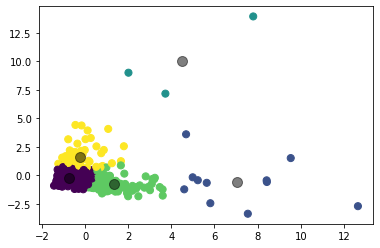

In [20]:
plt.scatter(df_New[:,0],df_New[:,1], c=y_kmeans,s=50,cmap='viridis')
centers=KM.cluster_centers_
plt.scatter(centers[:,0],centers[:,1],c='black',s=100,alpha=0.5);